In [1]:
#set WD
import os
os.getcwd()
os.chdir('C:\\Users\\AT003502\\Documents\Phishing project')

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import re
%matplotlib notebook
from urllib.parse import urlparse
import whois
import datetime
import time
#import httplib2
import urllib
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [3]:
DATA_PATH = 'hmrc.csv'
dataframe = pd.read_csv(DATA_PATH, index_col=0,encoding="ISO-8859-1")

In [5]:
#dataframe.sample(n=5)
#dataframe.head()

#for i in range(string[index:]):
    



In [258]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'length'] = (len(row['url']))

In [6]:
#dataframe.head(5)

## Numerical feature extraction

In [260]:
#suffix ends in RU
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'RU'] = 1.0 if '.ru' in row['url'] else 0.0

In [261]:
#suffix ends in .com
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Com'] = 1.0 if '.com' in row['url'] else 0.0

In [262]:
#suffix ends in .org
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Org'] = 1.0 if '.org' in row['url'] else 0.0

In [263]:
#suffix ends in .co
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Co'] = 1.0 if '.co.' in row['url'] else 0.0

In [264]:
#IP address in the url
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'IP_add'] = 1.0 if re.search( r'[0-9]+(?:\.[0-9]+){3}',(str(row['url']))) else 0.0


In [265]:
# Check for @ symbol
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'has_at_symbol'] = 1.0 if '@' in (str(row['url'])) else 0.0

In [266]:
# Prefix Suffix (i.e. has - in domain name)
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'pref_suf']  = 1.0 if '-' in row['url'] else 0.0

In [267]:
# Count number of dots
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'no_dots'] = (str(row['url'])).count(".")

In [269]:
#double slash redirection
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'redirection'] = (str(row['url'])).count("//")


In [270]:
#count number subdirectories in ur;
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'subdirectory'] =(str(row['url'])).count("/") 

In [271]:
#domain
#t="http://google.com"
import tldextract
#tldextract.extract(t).domain
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'domain'] =tldextract.extract((str(row['url']))).domain

In [272]:
#subdomain
import tldextract
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'sub_domain'] =tldextract.extract((str(row['url']))).subdomain

In [273]:
#suffix

import tldextract
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'suffix'] =tldextract.extract((str(row['url']))).suffix

In [274]:
#domain+subdomain
dot="."
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dom_subdom'] =((str(row['domain']))+dot+(str(row['sub_domain'])))

In [275]:
#number dots in dom+subdoman
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dots_per_dom'] = 1 if (str(row['dom_subdom'])).count(".") > 1 else 0

In [276]:
#number dashes in url
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dashes'] = (str(row['url'])).count("-") 

In [277]:
#www in subdomain 
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'sub_dom_www'] = 1.0 if re.search( r'www',(str(row['sub_domain']))) else 0.0

In [278]:
#www in subdomain 
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'dom_sub_www'] = 1.0 if re.search( r'www',(str(row['dom_subdom']))) else 0.0

In [7]:
#dataframe.head(10)

## Analysing Data

<IPython.core.display.Javascript object>


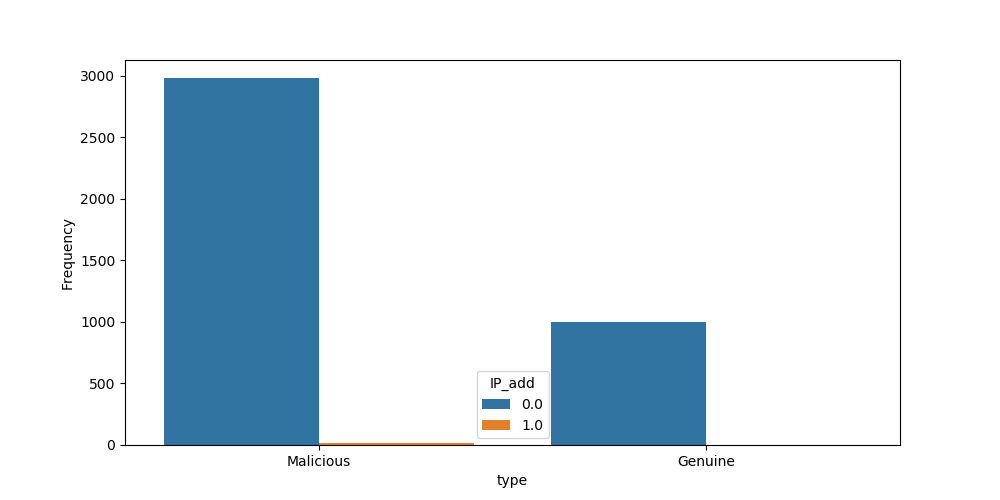

In [85]:
import seaborn as sns
sns.countplot(x="type", hue="IP_add",data=dataframe)

<IPython.core.display.Javascript object>


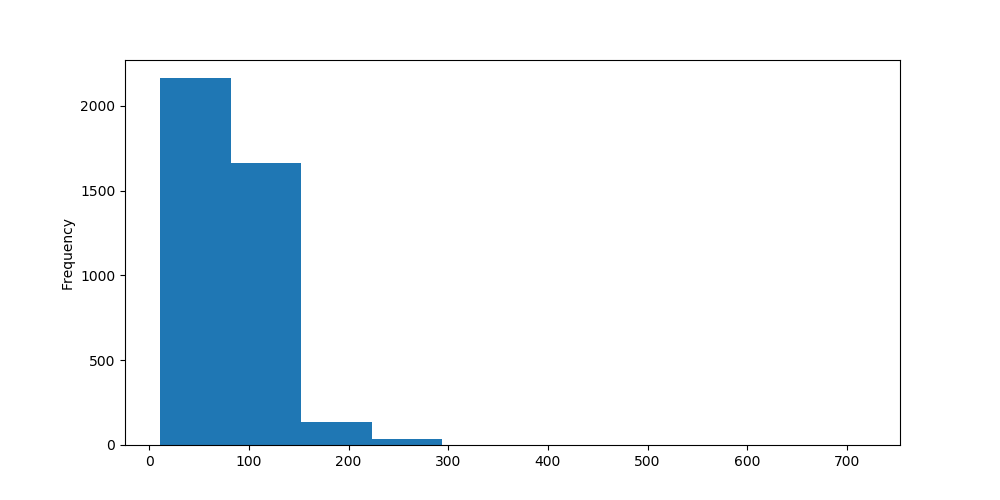

In [91]:
dataframe["length"].plot.hist(figsize=(10,5))

<IPython.core.display.Javascript object>


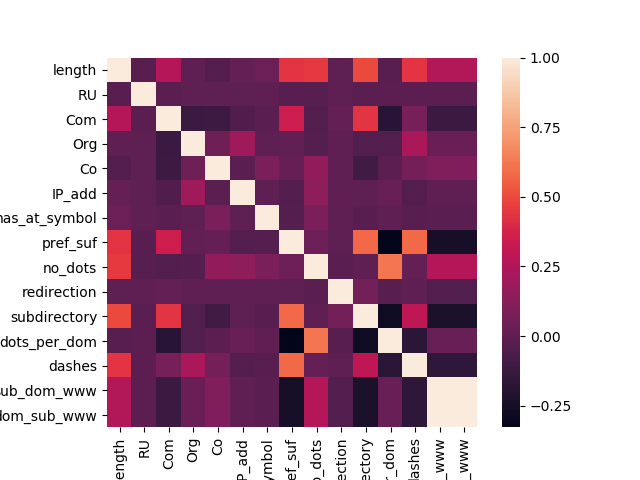

In [280]:
dataframe_sub=dataframe[['length','RU','Com','Org','Co','IP_add','has_at_symbol','pref_suf','no_dots','redirection','subdirectory','dots_per_dom','dashes','sub_dom_www','dom_sub_www']]
cor = dataframe_sub.corr()
sns.heatmap(cor, square = True)

In [281]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 21 columns):
url              4000 non-null object
type             4000 non-null object
length           4000 non-null float64
RU               4000 non-null float64
Com              4000 non-null float64
Org              4000 non-null float64
Co               4000 non-null float64
IP_add           4000 non-null float64
has_at_symbol    4000 non-null float64
pref_suf         4000 non-null float64
no_dots          4000 non-null float64
redirection      4000 non-null float64
subdirectory     4000 non-null float64
domain           4000 non-null object
sub_domain       4000 non-null object
suffix           4000 non-null object
dom_subdom       4000 non-null object
dots_per_dom     4000 non-null float64
dashes           4000 non-null float64
sub_dom_www      4000 non-null float64
dom_sub_www      4000 non-null float64
dtypes: float64(15), object(6)
memory usage: 847.5+ KB


<IPython.core.display.Javascript object>


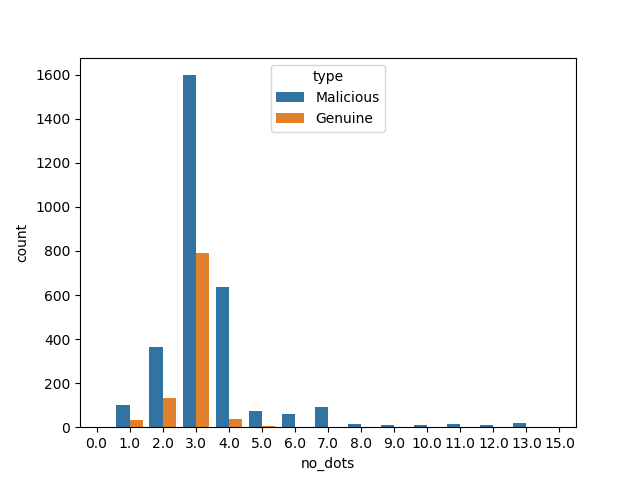

In [93]:
sns.countplot(x="no_dots", hue="type", data=dataframe)

## Data wrangling

In [1]:
#dataframe.isnull()

In [283]:
dataframe.isnull().sum()

url              0
type             0
length           0
RU               0
Com              0
Org              0
Co               0
IP_add           0
has_at_symbol    0
pref_suf         0
no_dots          0
redirection      0
subdirectory     0
domain           0
sub_domain       0
suffix           0
dom_subdom       0
dots_per_dom     0
dashes           0
sub_dom_www      0
dom_sub_www      0
dtype: int64

In [98]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 21 columns):
url              4000 non-null object
type             4000 non-null object
length           4000 non-null float64
RU               4000 non-null float64
Com              4000 non-null float64
Org              4000 non-null float64
Co               4000 non-null float64
IP_add           4000 non-null float64
has_at_symbol    4000 non-null float64
pref_suf         4000 non-null float64
no_dots          4000 non-null float64
redirection      4000 non-null float64
subdirectory     4000 non-null float64
domain           4000 non-null object
sub_domain       4000 non-null object
suffix           4000 non-null object
dom_subdom       4000 non-null object
dots_per_dom     4000 non-null float64
dashes           4000 non-null float64
sub_dom_www      4000 non-null float64
dom_sub_www      4000 non-null float64
dtypes: float64(15), object(6)
memory usage: 847.5+ KB


In [12]:
dataframe=dataframe.drop(["domain", "sub_domain", "suffix","dom_subdom"], axis=1)
#dataframe.head()

In [8]:
#dataframe.sample(10)

In [9]:
dataframe=dataframe.drop(["url"], axis=1)
#dataframe.tail(10)

In [295]:
# convert into numerical
tag=pd.get_dummies(dataframe["type"],drop_first=True)
tag.tail(5)

#add into dataframe
dataframe=pd.concat([dataframe], axis=1)

#dataframe.head()


In [10]:
tag=pd.get_dummies(dataframe["type"],drop_first=True)
tag.tail(5)
dataframe=pd.concat([dataframe, tag], axis=1)
#dataframe.head()

## Training data

In [297]:
X=dataframe.drop(["type","Malicious"], axis=1)
y= dataframe["Malicious"]
X.head(5)

,length,RU,Com,Org,Co,IP_add,has_at_symbol,pref_suf,no_dots,redirection,subdirectory,dots_per_dom,dashes,sub_dom_www,dom_sub_www
Index,,,,,,,,,,,,,,,
1,58.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0
2,92.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,1.0,8.0,1.0,1.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0
4,40.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0
5,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0


In [298]:
from sklearn.cross_validation import train_test_split

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
logmodel=LogisticRegression()

In [302]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
predictions = logmodel.predict(X_test)


In [304]:
from sklearn.metrics import classification_report

In [305]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.87      0.87      0.87       203\n          1       0.95      0.96      0.96       597\n\navg / total       0.93      0.93      0.93       800\n'

In [306]:
from sklearn.metrics import confusion_matrix

In [324]:
confusion_matrix(y_test,predictions)

array([[176,  27],
       [ 26, 571]], dtype=int64)

In [308]:
from sklearn.metrics import accuracy_score

In [310]:
accuracy_score(y_test,predictions)

0.93375

## Improving the model

In [312]:
X=dataframe.drop(["type","Malicious"], axis=1)
X=dataframe.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
y=dataframe.iloc[:,16].values
#dataframe.info()

In [313]:
X

array([[58.,  0.,  1., ...,  0.,  0.,  0.],
       [92.,  0.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [61.,  0.,  0., ...,  3.,  0.,  0.],
       [61.,  0.,  0., ...,  6.,  0.,  0.],
       [24.,  0.,  1., ...,  0.,  0.,  0.]])

In [314]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [315]:
from sklearn.cross_validation import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [317]:
from sklearn.preprocessing import StandardScaler

In [318]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [321]:
y_pred=classifier.predict(X_test)

In [322]:
from sklearn.metrics import accuracy_score

In [323]:
accuracy_score(y_test,predictions)

0.93375